### Import libraries and data

In [21]:
# import libraries, packages and modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import altair as alt
import warnings
warnings.filterwarnings('ignore')

In [22]:
def fraud(df):
    return df[df.FraudResult == 1]

def no_fraud(df):
    return df[df.FraudResult == 0]

In [23]:
# import data

df = pd.read_csv("data/training.csv")
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [24]:
import datetime

# Transform type object to type datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionStartTime'].head()

# Split date and time
df['Date'] = df['TransactionStartTime'].dt.date
df['Time'] = df['TransactionStartTime'].dt.time

# Split Date into year, month, week and day
df['Year'] = df['TransactionStartTime'].dt.year
df['Month'] = df['TransactionStartTime'].dt.month
df['Week'] = df['TransactionStartTime'].dt.isocalendar().week
df['Day'] = df['TransactionStartTime'].dt.day



# 0 = Monday - 6 = Sunday
df['Day_of_week'] = df['TransactionStartTime'].dt.dayofweek

# drop redundant columns
df.drop("Date", axis=1, inplace=True)
df.drop("TransactionStartTime", axis=1, inplace=True)


### Data cleaning

In [25]:
df.head(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,PricingStrategy,FraudResult,Time,Year,Month,Week,Day,Day_of_week
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000.0,1000,2,0,02:18:49,2018,11,46,15,3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-20.0,20,2,0,02:19:08,2018,11,46,15,3
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500.0,500,2,0,02:44:21,2018,11,46,15,3


In [26]:
# clean entries

df["TransactionId"]=df.TransactionId.str.split('_').str[-1]
df["BatchId"]=df.BatchId.str.split('_').str[-1]
df["AccountId"]=df.AccountId.str.split('_').str[-1]
df["SubscriptionId"]=df.SubscriptionId.str.split('_').str[-1]
df["CustomerId"]=df.CustomerId.str.split('_').str[-1]
#df["ProviderId"]=df.ProviderId.str.split('_').str[-1]
#df["ProductId"]=df.ProductId.str.split('_').str[-1]
#df["ChannelId"]=df.ChannelId.str.split('_').str[-1]

In [27]:
# drop: CountryCode (single value), CurrencyCode (single value) and Value (unclear difference between Value and Amount)
df.drop("CountryCode", axis=1, inplace=True)
df.drop("CurrencyCode", axis=1, inplace=True)
df.drop("Value", axis=1, inplace=True)

In [28]:
# create new column SignAmount with the sign of Amount (0 for - and 1 for +)
df["SignAmount"] = df["Amount"].apply(lambda x: 1 if x >= 0 else 0)

# create new column AbsAmount with the absolute of Amount
df.eval("ModAmount = abs(Amount)", inplace=True)

# delete Amount column
df.drop("Amount", axis=1, inplace=True)

In [29]:
df.head(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,FraudResult,Time,Year,Month,Week,Day,Day_of_week,SignAmount,ModAmount
0,76871,36123,3957,887,4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,2,0,02:18:49,2018,11,46,15,3,1,1000.0
1,73770,15642,4841,3829,4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,0,02:19:08,2018,11,46,15,3,0,20.0
2,26203,53941,4229,222,4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,2,0,02:44:21,2018,11,46,15,3,1,500.0


Accounts per customer

In [43]:
#df.groupby(["CustomerId", "AccountId"]).count()

TransactionId  BatchId  SubscriptionId  ProviderId  \
CustomerId AccountId                                                       
1          1074                   1        1               1           1   
10         1074                   1        1               1           1   
1001       4841                   2        2               2           2   
           661                    3        3               3           3   
1002       4841                   6        6               6           6   
...                             ...      ...             ...         ...   
996        4841                   1        1               1           1   
           656                   15       15              15          15   
998        4840                   1        1               1           1   
           4841                   7        7               7           7   
           658                   14       14              14          14   

                      ProductId  ProductCategory  ChannelId  PricingStrategy  \
CustomerId AccountId                                                           
1          1074               1                1          1                1   
10         1074               1                1          1                1   
1001       4841               2                2          2                2   
           661                3                3          3                3   
1002       4841               6                6          6                6   
...                         ...              ...        ...              ...   
996        4841               1                1          1                1   
           656               15               15         15               15   
998        4840               1                1          1                1   
           4841               7                7          7                7   
           658               14               14         14               14   

                      FraudResult  Time  ...  Month  Week  Day  Day_of_week  \
CustomerId AccountId                     ...                                  
1          1074                 1     1  ...      1     1    1            1   
10         1074                 1     1  ...      1     1    1            1   
1001       4841                 2     2  ...      2     2    2            2   
           661                  3     3  ...      3     3    3            3   
1002       4841                 6     6  ...      6     6    6            6   
...                           ...   ...  ...    ...   ...  ...          ...   
996        4841                 1     1  ...      1     1    1            1   
           656                 15    15  ...     15    15   15           15   
998        4840                 1     1  ...      1     1    1            1   
           4841                 7     7  ...      7     7    7            7   
           658                 14    14  ...     14    14   14           14   

                      SignAmount  ModAmount  total_transactions_by_customer  \
CustomerId AccountId                                                          
1          1074                1          1                               1   
10         1074                1          1                               1   
1001       4841                2          2                               2   
           661                 3          3                               3   
1002       4841                6          6                               6   
...                          ...        ...                             ...   
996        4841                1          1                               1   
           656                15         15                              15   
998        4840                1          1                               1   
           4841                7          7                               7   
           658  

BatchSize

In [55]:
df["batch_size"]= df.groupby(["BatchId"]).transform("count")["TransactionId"]
df.drop("BatchId", axis=1, inplace=True)
df.sort_values("batch_size", ascending=False).head(5)


,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,FraudResult,...,Week,Day,Day_of_week,SignAmount,ModAmount,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week,transactions_by_customer_this_day,batch_size
39218,125577,835,3465,1180,ProviderId_6,ProductId_3,airtime,ChannelId_3,2,0,...,52,24,0,1,1000.0,67,31,31,31,28
39201,48260,835,3465,1180,ProviderId_6,ProductId_3,airtime,ChannelId_3,2,0,...,52,24,0,1,1000.0,67,31,31,31,28
39195,112273,835,3465,1180,ProviderId_6,ProductId_3,airtime,ChannelId_3,2,0,...,52,24,0,1,1000.0,67,31,31,31,28
39196,57904,835,3465,1180,ProviderId_6,ProductId_3,airtime,ChannelId_3,2,0,...,52,24,0,1,1000.0,67,31,31,31,28
39220,104815,835,3465,1180,ProviderId_6,ProductId_3,airtime,ChannelId_3,2,0,...,52,24,0,1,1000.0,67,31,31,31,28


<AxesSubplot:xlabel='batch_size', ylabel='FraudResult'>

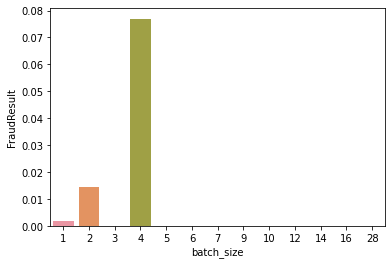

In [54]:
sns.barplot(data=df.groupby(["batch_size"]).mean().reset_index(), x= "batch_size", y= "FraudResult")

<AxesSubplot:xlabel='batch_size', ylabel='Count'>

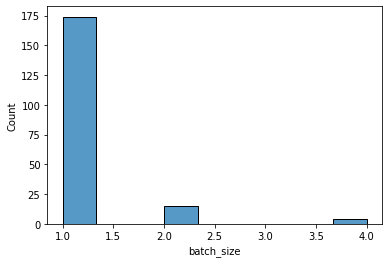

In [57]:
sns.histplot(data=fraud(df), x= "batch_size")

=> Batch size probalby unnecessary

### Total transactions per customer'

In [30]:
df["total_transactions_by_customer"] = df.groupby(["CustomerId"]).transform("count")["TransactionId"]
df.sort_values("total_transactions_by_customer", ascending=False).head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,FraudResult,Time,Year,Month,Week,Day,Day_of_week,SignAmount,ModAmount,total_transactions_by_customer
15025,113825,93350,4249,4429,7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,0,15:30:36,2018,12,49,4,1,0,5000.0,4091
52603,47400,136786,4249,4429,7343,ProviderId_4,ProductId_10,airtime,ChannelId_2,4,0,10:03:30,2019,1,2,8,1,0,110000.0,4091
54027,76520,59403,4249,4429,7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,0,11:31:46,2019,1,2,8,1,0,25000.0,4091
54026,111360,138435,4249,4429,7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,0,11:31:42,2019,1,2,8,1,0,30000.0,4091
54025,118795,36398,4249,4429,7343,ProviderId_4,ProductId_10,airtime,ChannelId_2,4,0,11:31:38,2019,1,2,8,1,0,25000.0,4091


Total transactions in this month by this customer


In [31]:
df["transactions_by_customer_this_month"] = df.groupby(["CustomerId", "Year", "Month"]).transform("count")["TransactionId"]
df.sort_values("transactions_by_customer_this_month", ascending=False).head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,...,Time,Year,Month,Week,Day,Day_of_week,SignAmount,ModAmount,total_transactions_by_customer,transactions_by_customer_this_month
27707,20382,40350,3206,1372,3634,ProviderId_6,ProductId_3,airtime,ChannelId_3,2,...,19:38:11,2018,12,50,14,4,1,1000.0,2085,2081
31825,2809,10128,3206,1372,3634,ProviderId_6,ProductId_10,airtime,ChannelId_3,2,...,14:50:50,2018,12,51,18,1,1,500.0,2085,2081
38022,98546,51964,4841,3829,3634,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,...,09:39:53,2018,12,51,23,6,0,75.0,2085,2081
29838,101324,9015,4841,3829,3634,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,...,18:01:22,2018,12,50,16,6,0,25.0,2085,2081
38018,8013,65414,3206,1372,3634,ProviderId_6,ProductId_3,airtime,ChannelId_3,2,...,09:38:59,2018,12,51,23,6,1,1500.0,2085,2081


Total transactions in this week by this customer


In [32]:
df["transactions_by_customer_this_week"] = df.groupby(["CustomerId", "Year", "Week"]).transform("count")["TransactionId"]
df.sort_values("transactions_by_customer_this_week", ascending=False).head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,...,Year,Month,Week,Day,Day_of_week,SignAmount,ModAmount,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week
16903,121657,43339,4249,4429,7343,ProviderId_4,ProductId_10,airtime,ChannelId_2,4,...,2018,12,49,4,1,0,15000.0,4091,2047,2005
15497,52764,61494,4249,4429,7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,...,2018,12,49,4,1,0,12500.0,4091,2047,2005
15482,64948,136245,4249,4429,7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,...,2018,12,49,4,1,0,30000.0,4091,2047,2005
15484,83331,127576,4249,4429,7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,...,2018,12,49,4,1,0,30000.0,4091,2047,2005
15485,127489,139141,4249,4429,7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,...,2018,12,49,4,1,0,30000.0,4091,2047,2005


Total transactions on this day by this customer

In [33]:
df["transactions_by_customer_this_day"] = df.groupby(["CustomerId", "Year", "Month", "Day"]).transform("count")["TransactionId"]
df.sort_values("transactions_by_customer_this_day", ascending=False)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,...,Month,Week,Day,Day_of_week,SignAmount,ModAmount,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week,transactions_by_customer_this_day
53496,116788,136755,4249,4429,7343,ProviderId_4,ProductId_10,airtime,ChannelId_2,4,...,1,2,8,1,0,10000.0,4091,2016,2000,1999
54293,130101,8510,4249,4429,7343,ProviderId_4,ProductId_10,airtime,ChannelId_2,4,...,1,2,8,1,0,25000.0,4091,2016,2000,1999
54286,95044,67876,4249,4429,7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,...,1,2,8,1,0,15000.0,4091,2016,2000,1999
54287,107930,120124,4249,4429,7343,ProviderId_4,ProductId_10,airtime,ChannelId_2,4,...,1,2,8,1,0,15000.0,4091,2016,2000,1999
54288,21198,8530,4249,4429,7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,...,1,2,8,1,0,25000.0,4091,2016,2000,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90739,39441,120700,1928,2980,2322,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2,...,2,6,8,4,1,10000.0,5,5,5,1
71028,120760,134540,2811,393,3233,ProviderId_6,ProductId_3,airtime,ChannelId_3,2,...,1,4,25,4,1,5000.0,141,35,8,1
84698,138764,17732,638,4491,977,ProviderId_6,ProductId_3,airtime,ChannelId_3,2,...,2,6,4,0,1,622.0,60,3,1,1
17230,117663,100718,3230,970,3658,ProviderId_6,ProductId_11,data_bundles,ChannelId_3,2,...,12,49,5,2,1,1000.0,47,43,24,1


"Normal" amount of transactions per month (mode)

In [34]:
#median transactions per month in the year by this customer
#(df.groupby(["CustomerId", "Year", "Month"]).mean()["transactions_by_customer_this_month"]).groupby(["CustomerId", "Year"]).median() 

CustomerId  Year
1           2018     1.0
10          2018     1.0
1001        2018     5.0
1002        2018     4.0
            2019     3.0
                    ... 
993         2019     5.0
994         2018    19.0
            2019    31.5
996         2018    17.0
998         2019    11.0
Name: transactions_by_customer_this_month, Length: 4721, dtype: float64

Create "Transactions per month of customer"

In [37]:
df[df.AccountId == df.SubscriptionId]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,...,Month,Week,Day,Day_of_week,SignAmount,ModAmount,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week,transactions_by_customer_this_day


In [38]:
df.TransactionId.unique().shape

(95662,)

Check amount of transactions per month vs fraud